#  Introdução 

Irei analisar os dados das 100 músicas mais tocadas do Spotify de 2018 - 2022.

A ideia é analisar dados sobre os artistas mais ouvidos pelos usuários da plataforma, também terá o objetivo de testar as determinadas: <b>

<b>. 1º Faixas lançadas em anos mais recentes têm maior probabilidade de serem mais populares do que faixas lançadas em anos anteriores.

<b>. 2º Faixas com alta energia têm maior probabilidade de serem mais populares do que faixas com baixa energia.

<b>. 3º Faixas com alta dançabilidade têm maior probabilidade de serem mais populares do que faixas com baixa dançabilidade.

<b>. 4º Faixas com alto volume (loudness) têm maior probabilidade de serem mais populares do que faixas com baixa volume.
    
<b>. 5º Faixas com valência mais positivas têm maior probabilidade de serem mais populares do que faixas com valência mais negativas.

<b>. 6º Faixas mais acústicas tendem a ter menor popularidade que faixas menos acústicas.


<b>Nota: Irei primeiro avaliar pela estrutura do dataset 


### Descrevendo cada coluna 

track_uri: identificador único para cada faixa (track) no catálogo do Spotify.

track: o nome da faixa.

artist: o nome do artista que gravou a faixa.

artist_popularity: um valor entre 0 e 100 que indica a popularidade do artista no Spotify. Quanto maior o valor, mais popular o artista.

followers: o número de seguidores que o artista tem no Spotify.

artist_genre: o(s) gênero(s) musical(is) associado(s) ao artista.

track_popularity: um valor entre 0 e 100 que indica a popularidade da faixa no Spotify. Quanto maior o valor, mais popular a faixa.

album: o nome do álbum que contém a faixa.

year: o ano em que a faixa foi lançada.

danceability: um valor entre 0 e 1 que indica o quão adequada a faixa é para dançar.

valence: um valor entre 0 e 1 que indica o quão positiva é a faixa.

energy: um valor entre 0 e 1 que indica o quão energética é a faixa.

tempo: a velocidade da faixa, medida em batidas por minuto (BPM).

loudness: o volume geral da faixa, medido em decibéis (dB).

speechiness: um valor entre 0 e 1 que indica a quantidade de partes faladas na faixa.

instrumentalness: um valor entre 0 e 1 que indica a quantidade de partes instrumentais na faixa.

liveness: um valor entre 0 e 1 que indica o quão ao vivo é a gravação da faixa.

acousticness: um valor entre 0 e 1 que indica o quão acústica é a faixa.

key: a tonalidade da faixa, representada como um número inteiro entre 0 e 11, onde 0 representa C, 1 representa C#, 2 representa D, e assim por diante.



In [3]:
# importando bicliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

In [4]:
# carregando dataset
df = pd.read_csv('Spotify.csv')



In [4]:
df.shape

(500, 19)

In [5]:
df.head()


,track_uri,track,artist,artist_popularity,followers,artist_genre,track_popularity,album,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
0,6DCZcSspjsKoFjzjrWoCdn,God's Plan,Drake,97,70260570,"['canadian hip hop', 'canadian pop', 'hip hop'...",83,Scorpion,2018,0.754,0.357,0.449,77.169,-9.211,0.1090,0.000083,0.5520,0.0332,7
1,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,89,39233698,"['dfw rap', 'melodic rap', 'rap']",83,beerbongs & bentleys,2018,0.585,0.129,0.520,159.801,-6.136,0.0712,0.000070,0.1310,0.1240,5
2,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,The Weeknd,96,55208147,"['canadian contemporary r&b', 'canadian pop', ...",88,"My Dear Melancholy,",2018,0.461,0.175,0.593,134.170,-4.954,0.0356,0.000000,0.3070,0.1700,1
3,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Billie Eilish,89,73989789,"['art pop', 'electropop', 'pop']",88,lovely (with Khalid),2018,0.351,0.120,0.296,115.284,-10.109,0.0333,0.000000,0.0950,0.9340,4
4,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,85,23066688,"['dance pop', 'edm', 'electro house', 'house',...",87,One Kiss (with Dua Lipa),2018,0.791,0.592,0.862,123.994,-3.240,0.1100,0.000022,0.0814,0.0370,9


In [6]:
df.columns

Index(['track_uri', 'track', 'artist', 'artist_popularity', 'followers',
       'artist_genre', 'track_popularity', 'album', 'year', 'danceability',
       'valence', 'energy', 'tempo', 'loudness', 'speechiness',
       'instrumentalness', 'liveness', 'acousticness', 'key'],
      dtype='object')

buscarei primeiro saber se a valores nulos ou duplicatas ou colunas NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_uri          500 non-null    object 
 1   track              500 non-null    object 
 2   artist             500 non-null    object 
 3   artist_popularity  500 non-null    int64  
 4   followers          500 non-null    int64  
 5   artist_genre       500 non-null    object 
 6   track_popularity   500 non-null    int64  
 7   album              500 non-null    object 
 8   year               500 non-null    int64  
 9   danceability       500 non-null    float64
 10  valence            500 non-null    float64
 11  energy             500 non-null    float64
 12  tempo              500 non-null    float64
 13  loudness           500 non-null    float64
 14  speechiness        500 non-null    float64
 15  instrumentalness   500 non-null    float64
 16  liveness           500 non

In [8]:
df.isna().sum()

track_uri            0
track                0
artist               0
artist_popularity    0
followers            0
artist_genre         0
track_popularity     0
album                0
year                 0
danceability         0
valence              0
energy               0
tempo                0
loudness             0
speechiness          0
instrumentalness     0
liveness             0
acousticness         0
key                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

excluindo colunas não relevantes


In [10]:
df.drop('track_uri', inplace=True, axis=1)

In [11]:
df.head(10)

,track,artist,artist_popularity,followers,artist_genre,track_popularity,album,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
0,God's Plan,Drake,97,70260570,"['canadian hip hop', 'canadian pop', 'hip hop'...",83,Scorpion,2018,0.754,0.357,0.449,77.169,-9.211,0.1090,0.000083,0.5520,0.0332,7
1,rockstar (feat. 21 Savage),Post Malone,89,39233698,"['dfw rap', 'melodic rap', 'rap']",83,beerbongs & bentleys,2018,0.585,0.129,0.520,159.801,-6.136,0.0712,0.000070,0.1310,0.1240,5
2,Call Out My Name,The Weeknd,96,55208147,"['canadian contemporary r&b', 'canadian pop', ...",88,"My Dear Melancholy,",2018,0.461,0.175,0.593,134.170,-4.954,0.0356,0.000000,0.3070,0.1700,1
3,lovely (with Khalid),Billie Eilish,89,73989789,"['art pop', 'electropop', 'pop']",88,lovely (with Khalid),2018,0.351,0.120,0.296,115.284,-10.109,0.0333,0.000000,0.0950,0.9340,4
4,One Kiss (with Dua Lipa),Calvin Harris,85,23066688,"['dance pop', 'edm', 'electro house', 'house',...",87,One Kiss (with Dua Lipa),2018,0.791,0.592,0.862,123.994,-3.240,0.1100,0.000022,0.0814,0.0370,9
5,Lucid Dreams,Juice WRLD,91,27045858,"['chicago rap', 'melodic rap']",84,Goodbye & Good Riddance,2018,0.511,0.218,0.566,83.903,-7.230,0.2000,0.000000,0.3400,0.3490,6
6,The Middle,Zedd,76,5866220,"['complextro', 'dance pop', 'edm', 'electro ho...",79,The Middle,2018,0.753,0.437,0.657,107.010,-3.061,0.0449,0.000000,0.1120,0.1710,7
7,FRIENDS,Marshmello,83,34652549,"['brostep', 'dance pop', 'edm', 'pop', 'pop da...",78,FRIENDS,2018,0.626,0.534,0.880,95.079,-2.384,0.0504,0.000000,0.1280,0.2050,9
8,I Like It,Cardi B,82,20869665,"['dance pop', 'pop', 'rap']",77,Invasion of Privacy,2018,0.816,0.650,0.726,136.048,-3.998,0.1290,0.000000,0.3720,0.0990,5
9,we fell in love in october,girl in red,77,5643207,"['bedroom pop', 'indie pop', 'norwegian indie'...",85,we fell in love in october / October Passed Me By,2018,0.566,0.237,0.366,129.960,-12.808,0.0280,0.181000,0.1550,0.1130,7


Pronto!

Analisando o dataset

<AxesSubplot:xlabel='year'>

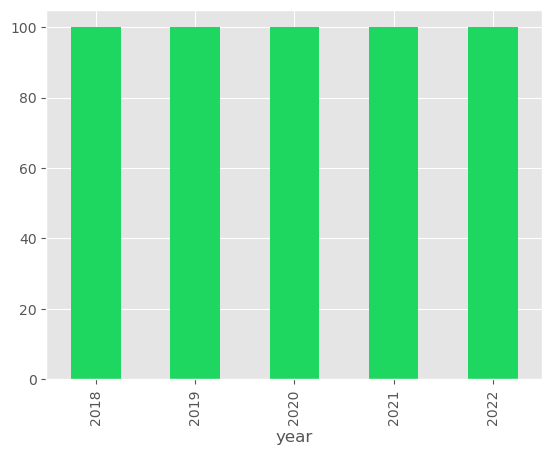

In [12]:
group = df.groupby(['year']).size()
color = '#1ED761'
group.plot.bar(color= color)

Pelo visto a distribuição está bem uniforme entre os anos

In [13]:
print(df['artist'].nunique())

243


Existem 243 artistas nessa lista

### Agora iniciarei a análise de Top 10 em algum quesitos 

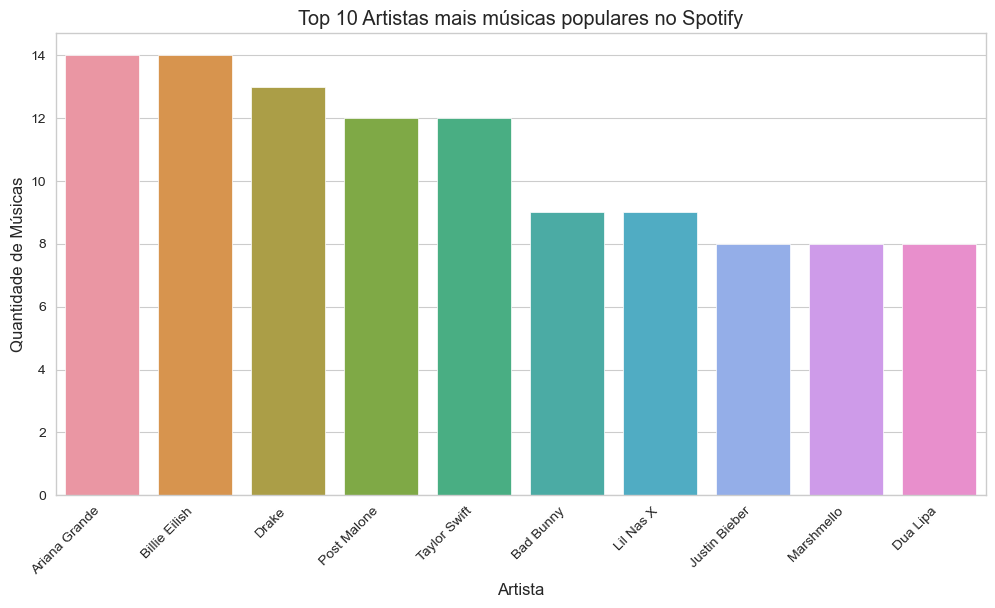

In [16]:
# Filtra as informações dos top 10 artistas
top10_artist = df['artist'].value_counts().nlargest(10)
df_top10 = df[df['artist'].isin(top10_artist.index)]

# Cria o gráfico de barras
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x ='artist', data = df_top10, order = top10_artist.index)
ax.set_title('Top 10 Artistas mais músicas populares no Spotify')
ax.set_xlabel('Artista')
ax.set_ylabel('Quantidade de Músicas')
plt.xticks(rotation=45, ha='right')
plt.show()


Como pode observar, esses são os 10 artistas mais populares do spotify

<b>Artistas com músicas com maior danceabilidade

In [17]:
# Agrupar o DataFrame por nome de artista
grouped_df = df.groupby('artist')

# Calcular a média de danceability para cada grupo
mean_danceability_by_artist = grouped_df['danceability'].mean()

# Criar um novo DataFrame com as médias calculadas
mean_danceability_df = pd.DataFrame(mean_danceability_by_artist).reset_index()

# Ordenar o DataFrame pela coluna de danceability em ordem decrescente
mean_danceability_df = mean_danceability_df.sort_values(by='danceability', ascending=False)




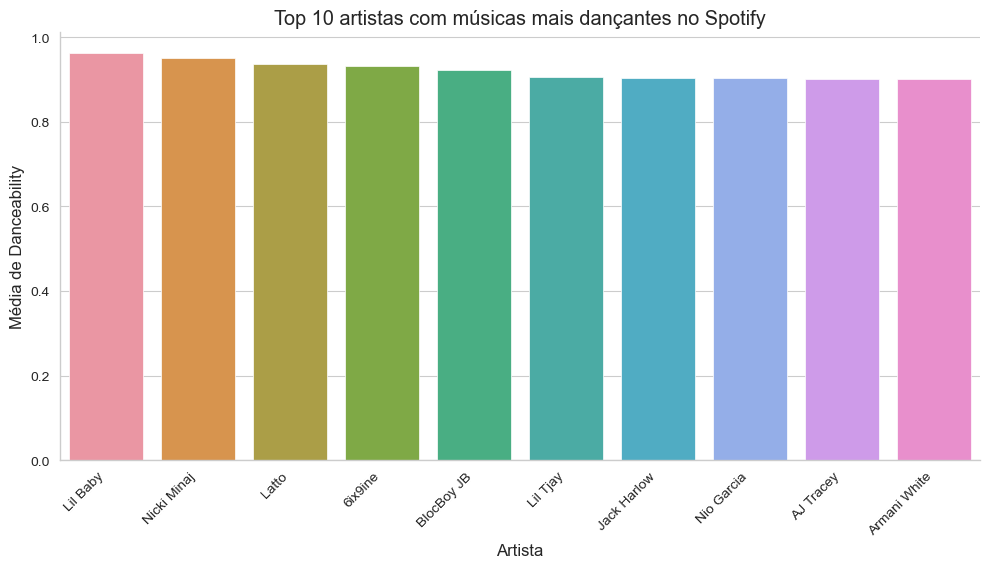

In [18]:
top10_dance = mean_danceability_df.head(10)
sns.catplot(x='artist', y='danceability', data= top10_dance, kind='bar', height=5, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 artistas com músicas mais dançantes no Spotify')
plt.xlabel('Artista')
plt.ylabel('Média de Danceability')
plt.show()


Vamos observar os artistas com as faixas mais populares 


In [20]:
# Agrupando o dataframe por nome do artista
grouped_df_popularity = df.groupby('artist')

# Agrupando pela média da popularidade da faixa de músicas de um mesmo artista
mean_track_popularity_by_artist = df.groupby('artist').mean()

# Criando um novo DataFrame adcionando essas médias
mean_popularity_df = pd.DataFrame(mean_track_popularity_by_artist).reset_index()

# Ordenar o DataFrame pela coluna track_popularity pela ordem decrescente
mean_popularity_df = mean_popularity_df.sort_values(by = 'track_popularity', ascending =  False)

In [21]:
top10_artist_popularity = mean_popularity_df.head(10)
top10_artist_popularity


,artist,artist_popularity,followers,track_popularity,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
54,David Guetta,89.0,25212859.0,96.0,2022.0,0.5610,0.3040,0.9650,128.0400,-3.6730,0.03430,0.000007,0.3710,0.00383,7.0
150,Meghan Trainor,86.0,12488656.0,93.0,2022.0,0.8380,0.8840,0.5250,144.9810,-3.5620,0.06650,0.000002,0.0771,0.34500,10.0
153,Metro Boomin,92.0,3469982.0,93.0,2022.0,0.7150,0.1720,0.6200,97.9500,-6.0050,0.04840,0.000000,0.0822,0.41700,1.0
192,Rema,81.0,1598179.0,93.0,2022.0,0.8010,0.8020,0.8060,106.9990,-5.2060,0.03810,0.000669,0.1140,0.38200,11.0
170,OneRepublic,85.0,14767716.0,93.0,2022.0,0.7040,0.8250,0.7970,139.9940,-5.9270,0.04750,0.000745,0.0546,0.08260,0.0
223,Tom Odell,80.0,2710749.0,92.0,2022.0,0.4450,0.1310,0.5370,122.7690,-8.5320,0.04000,0.000017,0.0944,0.69500,4.0
239,d4vd,81.0,459519.0,91.5,2022.0,0.5725,0.2520,0.5065,132.0375,-9.4110,0.02765,0.004071,0.2250,0.49350,5.0
106,Jung Kook,80.0,5518789.0,91.0,2022.0,0.7100,0.3410,0.8790,114.9930,-4.2180,0.04220,0.001420,0.4390,0.15800,0.0
102,Joji,87.0,7701139.0,89.0,2022.0,0.4560,0.2110,0.4175,158.8595,-8.3185,0.05205,0.063502,0.2150,0.63700,8.0
84,Harry Styles,90.0,25143615.0,88.2,2021.0,0.6012,0.6492,0.7724,115.7508,-4.4052,0.04876,0.000203,0.2378,0.18154,4.8


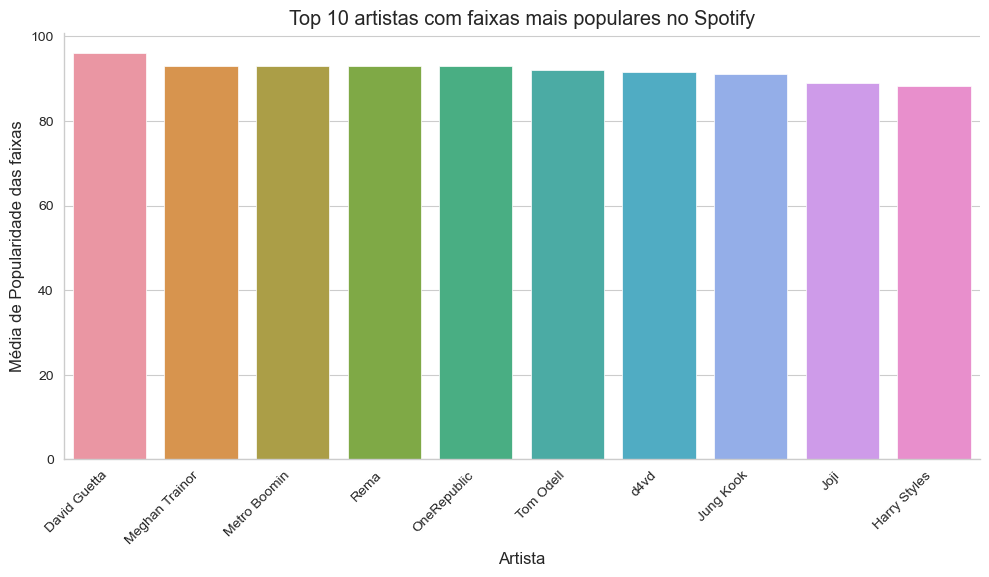

In [22]:
sns.catplot(x='artist', y='track_popularity', data= top10_artist_popularity, kind='bar', height=5, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 artistas com faixas mais populares no Spotify')
plt.xlabel('Artista')
plt.ylabel('Média de Popularidade das faixas')
plt.show()

<b>Agora iremos repertir oque já foi feito, porém será feito uma separação para cada ano (2018 - 2022)

In [24]:
# Agrupando as músicas por ano
df_year = df.groupby('year')

# Criando um dicionário de DataFrames separando as músicas por ano
dfs_by_year = {}
for year, group in df_year:
    dfs_by_year[year] = group

In [25]:
# Adcionando um DataFrame específico para músicas lançadas no ano de 2018
df_2018 = dfs_by_year[2018]
df_2018.head(5)

,track,artist,artist_popularity,followers,artist_genre,track_popularity,album,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
0,God's Plan,Drake,97,70260570,"['canadian hip hop', 'canadian pop', 'hip hop'...",83,Scorpion,2018,0.754,0.357,0.449,77.169,-9.211,0.1090,0.000083,0.5520,0.0332,7
1,rockstar (feat. 21 Savage),Post Malone,89,39233698,"['dfw rap', 'melodic rap', 'rap']",83,beerbongs & bentleys,2018,0.585,0.129,0.520,159.801,-6.136,0.0712,0.000070,0.1310,0.1240,5
2,Call Out My Name,The Weeknd,96,55208147,"['canadian contemporary r&b', 'canadian pop', ...",88,"My Dear Melancholy,",2018,0.461,0.175,0.593,134.170,-4.954,0.0356,0.000000,0.3070,0.1700,1
3,lovely (with Khalid),Billie Eilish,89,73989789,"['art pop', 'electropop', 'pop']",88,lovely (with Khalid),2018,0.351,0.120,0.296,115.284,-10.109,0.0333,0.000000,0.0950,0.9340,4
4,One Kiss (with Dua Lipa),Calvin Harris,85,23066688,"['dance pop', 'edm', 'electro house', 'house',...",87,One Kiss (with Dua Lipa),2018,0.791,0.592,0.862,123.994,-3.240,0.1100,0.000022,0.0814,0.0370,9


In [26]:
# Fazendo o mesmo para outros anos
df_2019 = dfs_by_year[2019]
df_2020 = dfs_by_year[2020]
df_2021 = dfs_by_year[2021]
df_2022 = dfs_by_year[2022]

Tendo separado as músicas por ano de lançamento e sabendo que cada ano possui uma distribuição de 100 músicas, poderemos fazer análise mais específicas para o determinado ano

In [29]:
# Criando uma função para repetir o processo separadamente

# Para popularidade do artista em determinado ano

def artist_popularity (df, year, n = 10):
        # Seleciona os top n artistas com mais músicas
    top_artists = df['artist'].value_counts().nlargest(n)
    df_top_artists = df[df['artist'].isin(top_artists.index)]

    # Plota o gráfico de barras
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x ='artist', data = df_top_artists, order = top_artists.index)
    ax.set_title(f'Top {n} Artistas com Mais Músicas Populares no Spotify em {year}')
    ax.set_xlabel('Artista')
    ax.set_ylabel('Quantidade de Músicas')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [30]:
# Para popularidade da faixa de um determinado artista no ano 

def track_popularity(df, year, n = 10):
    # Agrupando o dataframe por nome do artista
    grouped_df_popularity = df.groupby('artist')

    # Agrupando pela média da popularidade da faixa de músicas de um mesmo artista
    mean_track_popularity_by_artist = grouped_df_popularity['track_popularity'].mean()

    # Ordenar a Series pela ordem decrescente
    mean_popularity_series = mean_track_popularity_by_artist.sort_values(ascending=False)

    # Selecionando os artistas com a maior média de popularidade
    top_artists_popularity = mean_popularity_series.head(n)

    # Plotando um gráfico de barras com os artistas mais populares
    plt.figure(figsize = (12, 6))
    sns.barplot(x = top_artists_popularity.index, y=top_artists_popularity.values)
    plt.xticks(rotation = 45, ha = 'right')
    plt.title(f'Top {n} artistas com faixas mais populares no Spotify em {year}')
    plt.xlabel('Artista')
    plt.ylabel('Média de Popularidade das faixas')
    plt.show()

    return top_artists_popularity.to_frame(name='track_popularity')

In [33]:
# Para agrupar artistas com músicas mais dançantes por ordem decrescente

def plot_top_artists_by_danceability(df, year, n=10, ascending=False):
    # Agrupar o DataFrame por nome de artista
    grouped_df = df.groupby('artist')

    # Calcular a média da feature para cada grupo
    mean_danceability_by_artist = grouped_df["danceability"].mean()

    # Criar um novo DataFrame com as médias calculadas
    mean_danceability_df = pd.DataFrame(mean_danceability_by_artist).reset_index()

    # Ordenar o DataFrame pela coluna da feature em ordem decrescente
    mean_danceability_df = mean_danceability_df.sort_values(by = 'danceability', ascending=ascending)

    # Selecionar os 10 artistas com as maiores médias da feature
    top10 = mean_danceability_df.head(n)

    # Plotar gráfico de barras com os artistas selecionados
    sns.catplot(x ='artist', y = "danceability", data = top10, kind = 'bar', height = 5, aspect = 2)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {n} Artistas com as Músicas mais Dançantes no Spotify em {year}')
    plt.xlabel('Artista')
    plt.ylabel(f'Média de danceability')
    plt.show()

<b> Começando por 2018

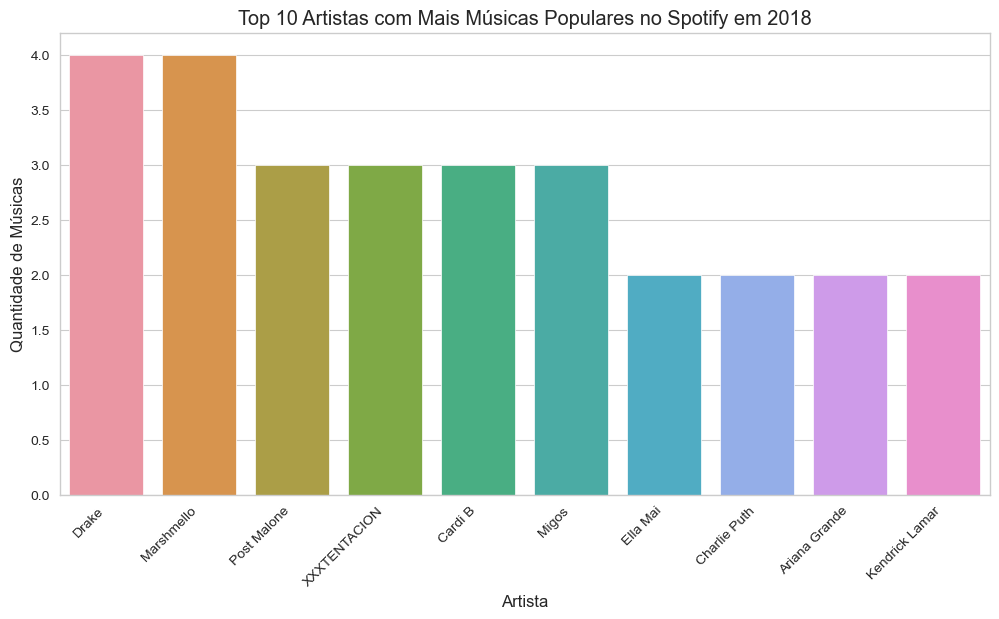

In [32]:
artist_popularity (df = df_2018, year = '2018', n = 10)


<b>Pode-se notar que na prática Drake e Mashmello dividiram o 1º lugar em número de músicas populares no ano de 2018, seguido por Post Malone, XXXTENTACION, Cardi B e Migos dividindo o pódio.

Agora iremos observar por faixas mais populares no mesmo ano

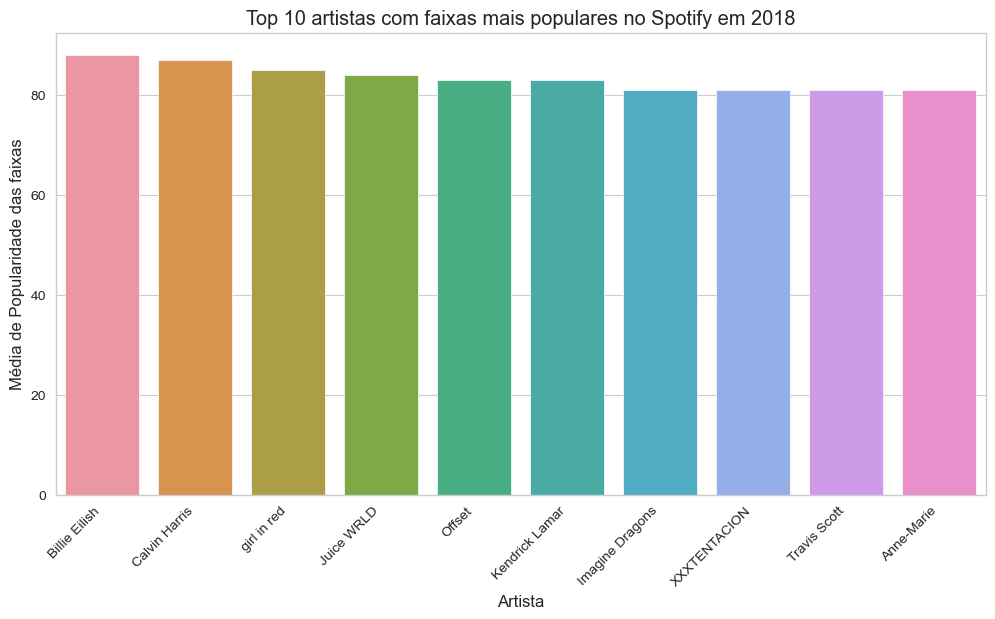

,track_popularity
artist,
Billie Eilish,88.0
Calvin Harris,87.0
girl in red,85.0
Juice WRLD,84.0
Offset,83.0
Kendrick Lamar,83.0
Imagine Dragons,81.0
XXXTENTACION,81.0
Travis Scott,81.0


In [40]:
track_popularity(df = df_2018, year = '2018', n = 10)

<b>O pódio dessa vez ficou com Billie Eilish, Calvin Harris e girl in red

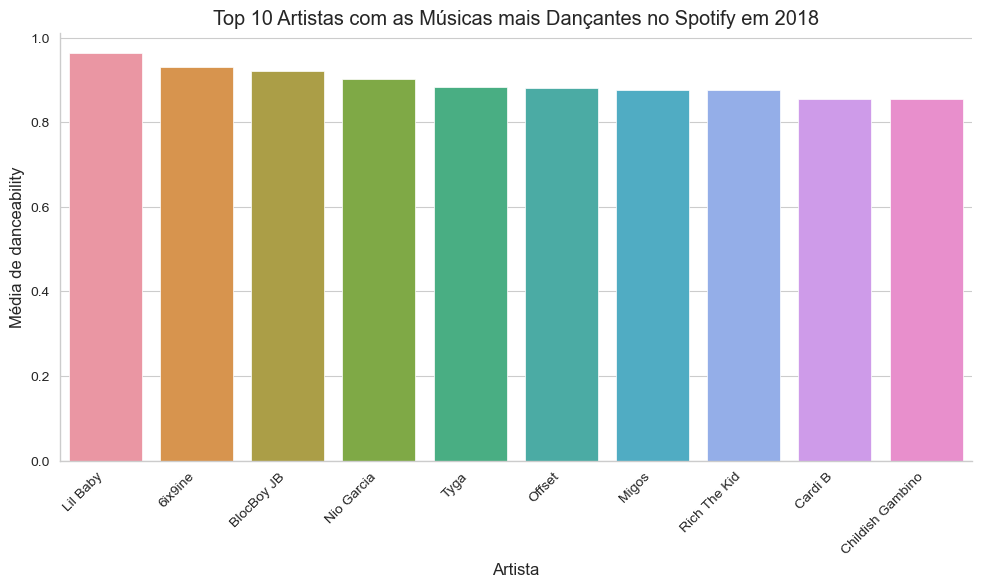

In [41]:
plot_top_artists_by_danceability(df_2018, year = '2018',  n=10, ascending=False)

<b> Lil Baby, 6ix9ine  e BlocBoy JB lideram em 2018 no quesito de músicas mais dançantes

Analisando o ano de <b>2019

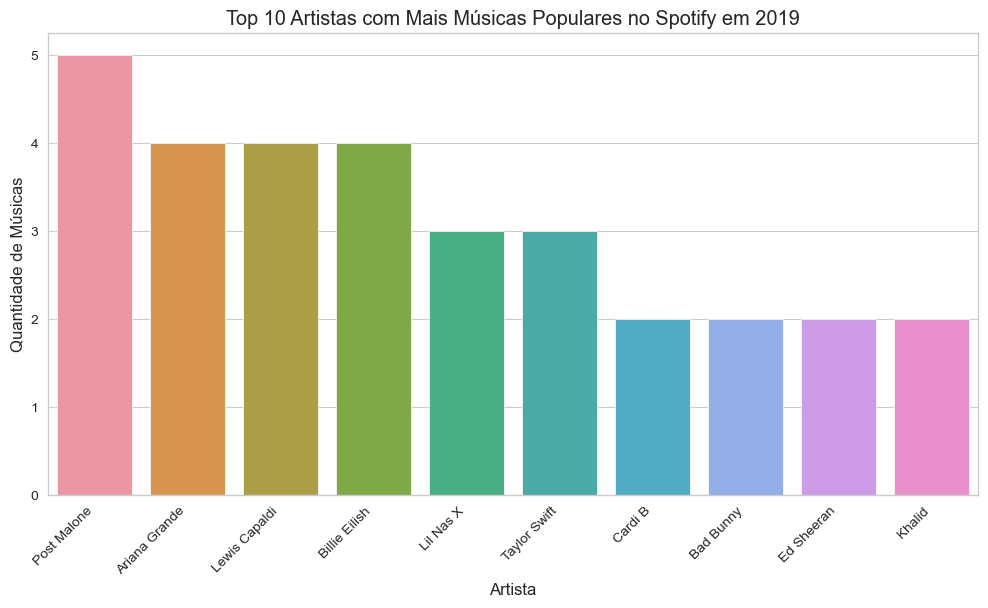

In [42]:
artist_popularity (df = df_2019, year = '2019', n = 10)

<b> Post Malone, Ariana Grande e Cardi B se mantiveram no Top 10 artistas com músicas mais populares em 2019. 
    Além disso, ocupam posições mais elevadas que o ano anterior.

Analisando artistas com faixas mais populares em 2019

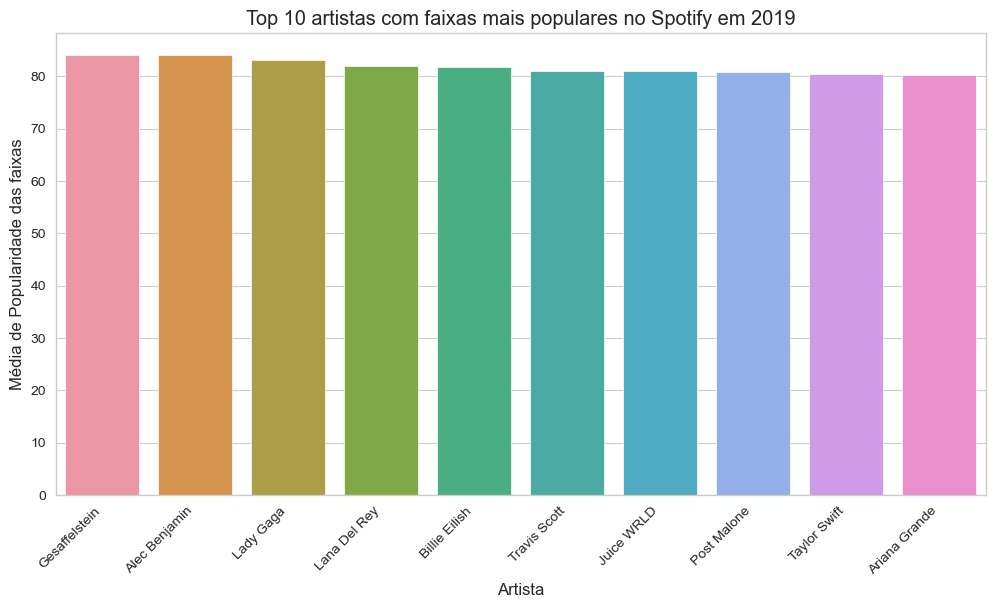

,track_popularity
artist,
Gesaffelstein,84.000000
Alec Benjamin,84.000000
Lady Gaga,83.000000
Lana Del Rey,82.000000
Billie Eilish,81.750000
Travis Scott,81.000000
Juice WRLD,81.000000
Post Malone,80.800000
Taylor Swift,80.333333


In [38]:
track_popularity(df = df_2019, year = '2019', n = 10)

<b> Dos artistas com faixas mais populares de 2018 se mantiveram apenas Travis Scott e Juice WRLD em posições inferiores, ainda que no Top 10

Analisando artistas com as músicas mais dançantes de 2019

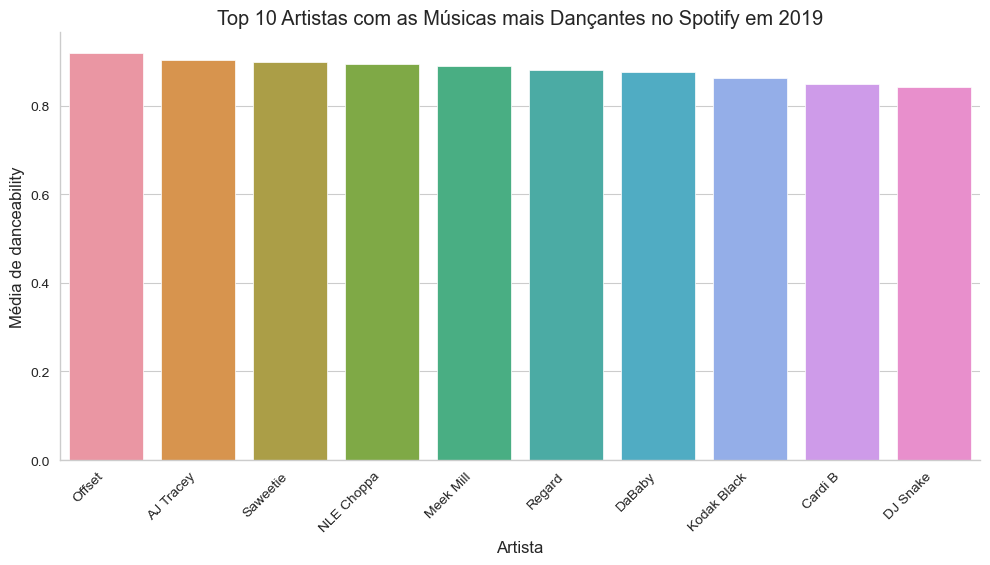

In [37]:
plot_top_artists_by_danceability(df = df_2019, year = '2019',  n=10, ascending=False)

<b> Válido notar que Cardi B se manteve em 2019 com uma das artistas com músicas mais dançantes

Analisando o ano de 2020

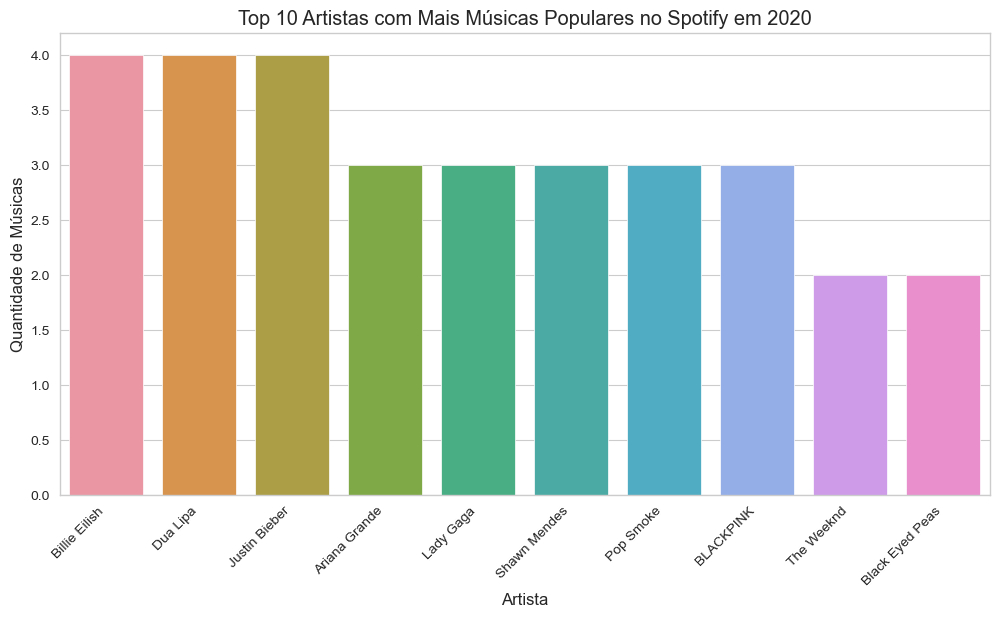

In [43]:
artist_popularity (df = df_2020, year = '2020', n = 10)

<b>Temos Billie Ellish, Dua Lipa e Justin Bieber com o mesmo número de músicas populares no ano de 2020

Analisando artistas com faixas mais populares em 2020

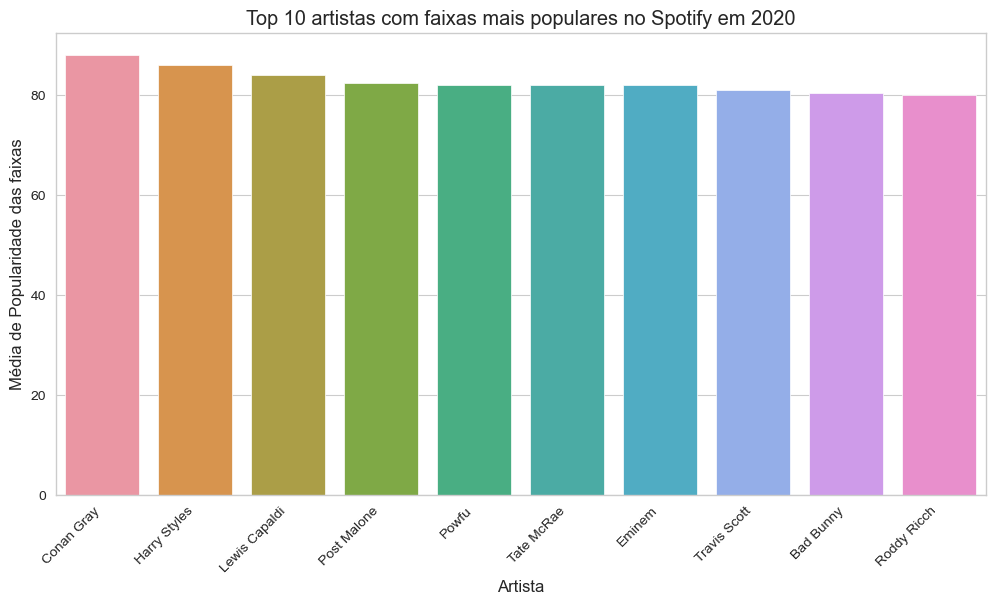

,track_popularity
artist,
Conan Gray,88.0
Harry Styles,86.0
Lewis Capaldi,84.0
Post Malone,82.5
Powfu,82.0
Tate McRae,82.0
Eminem,82.0
Travis Scott,81.0
Bad Bunny,80.5


In [44]:
track_popularity(df = df_2020, year = '2020', n = 10)

<b> Travis Scott e Post Malone retornam como artistas com faixas mais populares no ano de 2020

Analisando artistas com as músicas mais dançantes de 2020

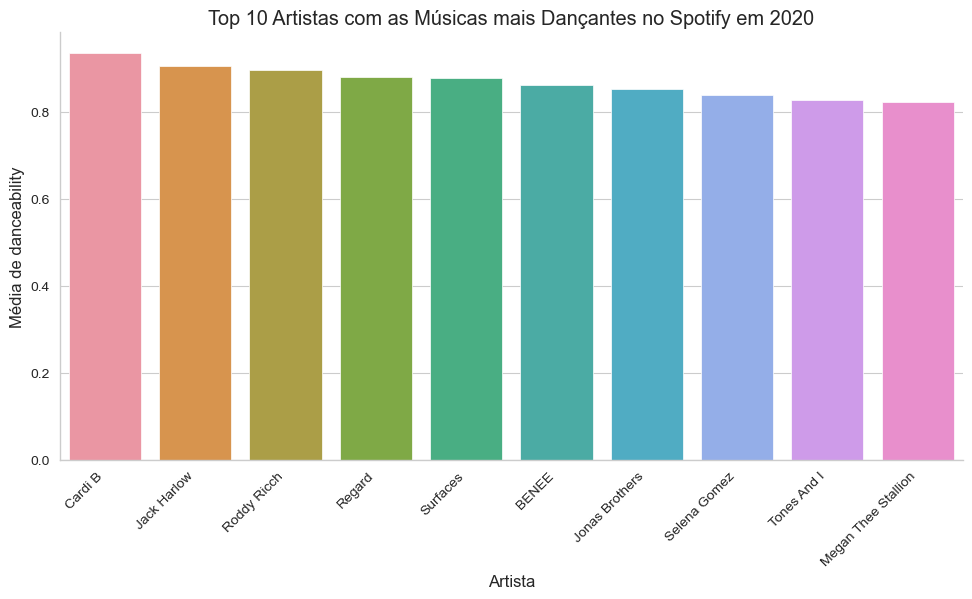

In [36]:
plot_top_artists_by_danceability(df= df_2020, year = '2020',  n=10, ascending=False)

<b>Cardi B novamente está no Top 10 e dessa vez está como a artista que possue as músicas mais dançantes no ano de 2020

Agora analisando o ano de 2021

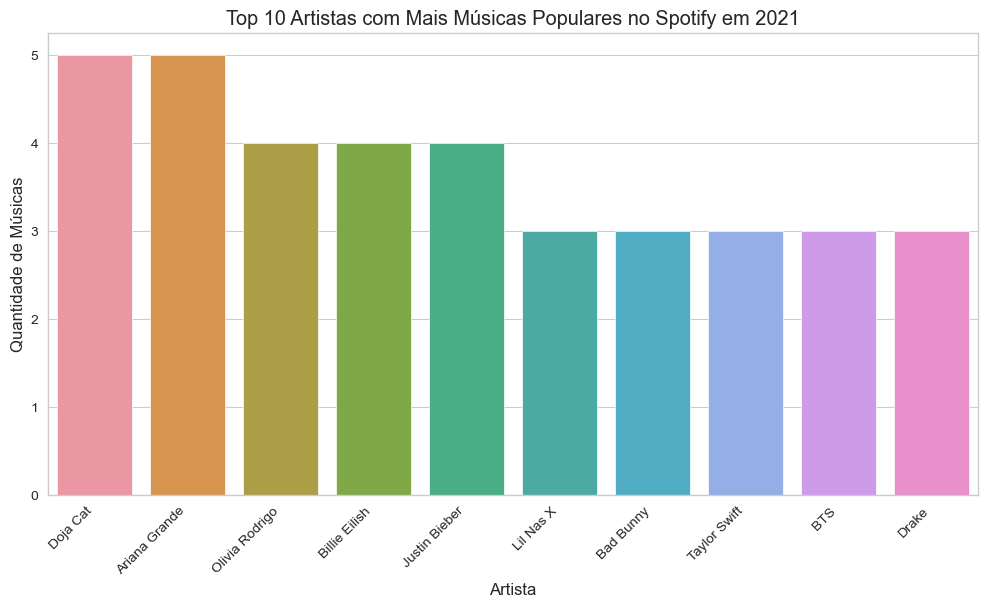

In [45]:
artist_popularity (df = df_2021, year = '2021', n = 10)

<b> O pódio de 1º lugar ficou dividido entre Doja Cat e Ariana Grande. Justin Bieber e Billie Ellish aparecem novamente no Top 10

Analisando artistas com faixas mais populares de 2021


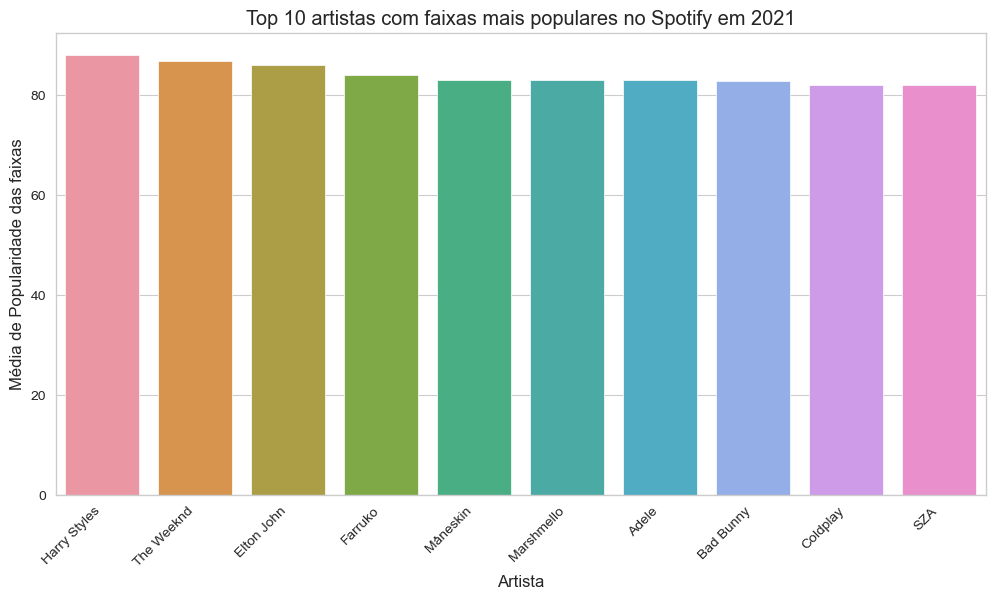

,track_popularity
artist,
Harry Styles,88.000000
The Weeknd,86.666667
Elton John,86.000000
Farruko,84.000000
Måneskin,83.000000
Marshmello,83.000000
Adele,83.000000
Bad Bunny,82.666667
Coldplay,82.000000


In [46]:
track_popularity(df = df_2021, year = '2021', n = 10)

<b> Aparece uma nova configuração de artistas com faixas mais populares, exceto pelo Harry Styles que agora ocupa o Top 1.

Analisando artistas com músicas mais dançantes de 2021

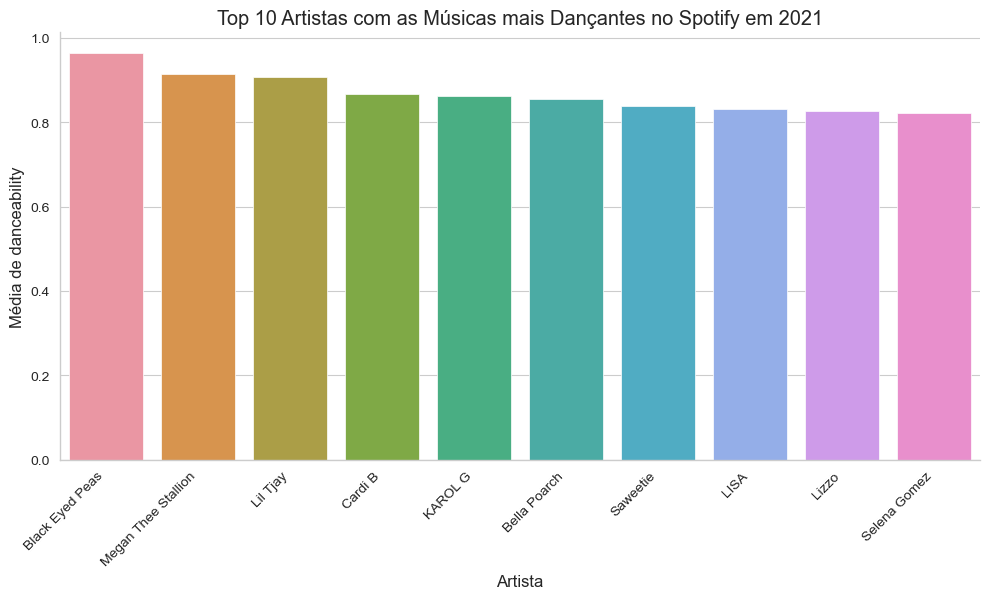

In [35]:
plot_top_artists_by_danceability(df = df_2021, year = '2021', n=10, ascending=False)

<b> Cardi B se mantém como uma das artistas com músicas mais dançantes do ano

Agora analisando para o ano de 2022

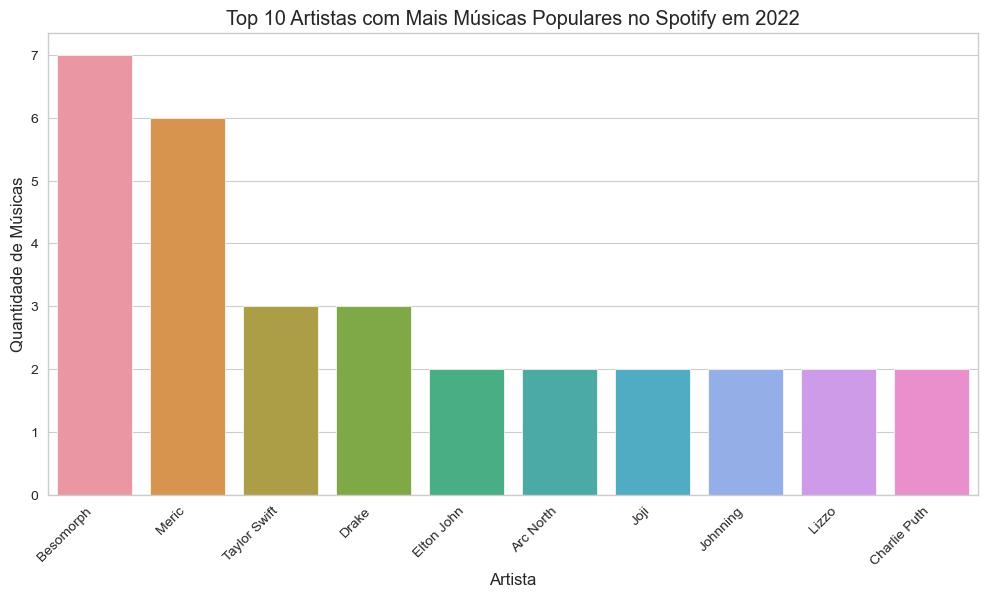

In [47]:
artist_popularity (df = df_2022, year = '2022', n = 10)

Analisando artistas com faixas mais populares no ano de 2022

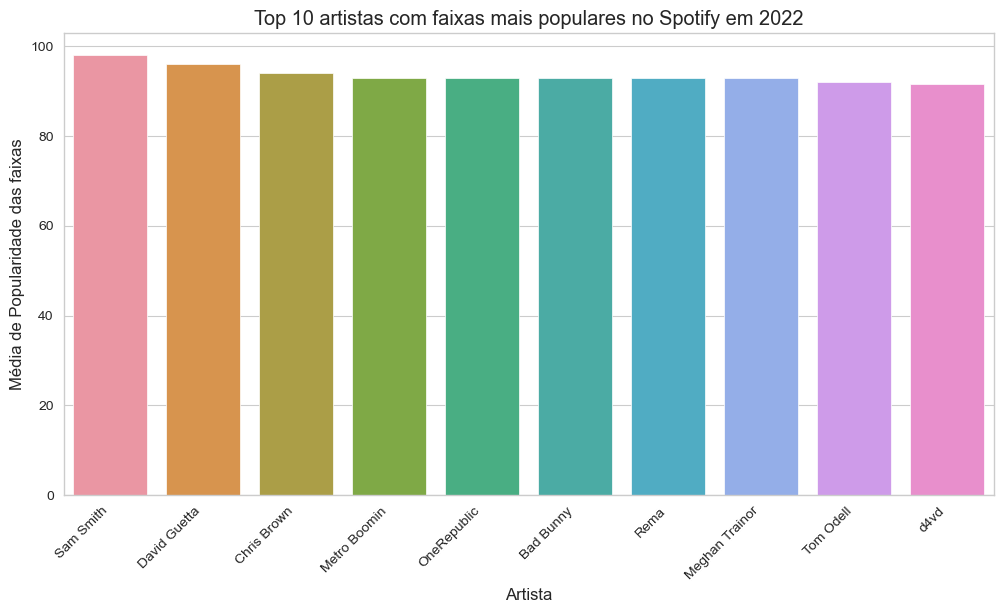

,track_popularity
artist,
Sam Smith,98.0
David Guetta,96.0
Chris Brown,94.0
Metro Boomin,93.0
OneRepublic,93.0
Bad Bunny,93.0
Rema,93.0
Meghan Trainor,93.0
Tom Odell,92.0


In [48]:
track_popularity(df = df_2022, year = '2022', n = 10)

<b> Uma nova configuração de artista aparece no Top 10 artistas com faixas mais populares em 2022

Analisando artistas com músicas mais dançantes de 2022

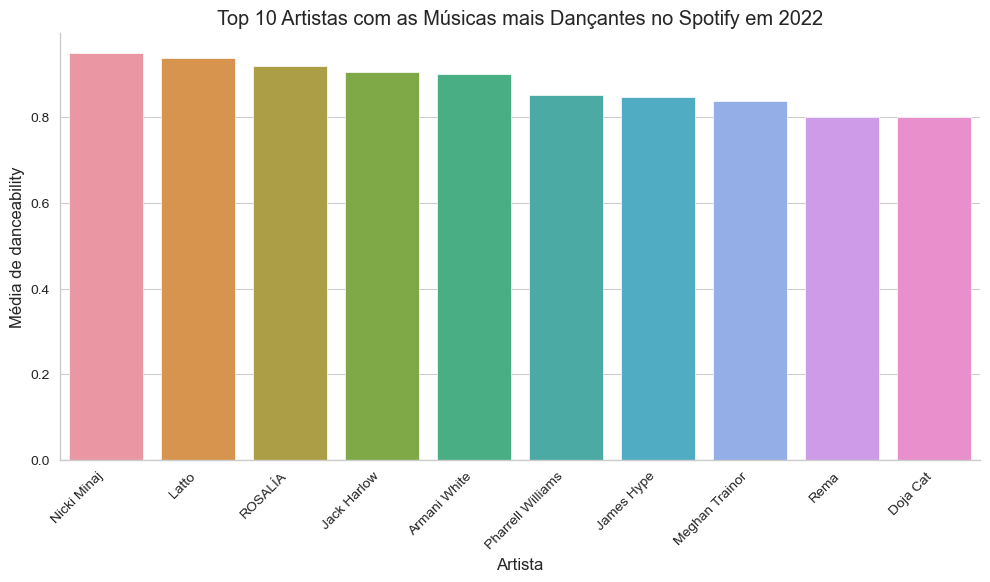

In [34]:
plot_top_artists_by_danceability(df = df_2022, year = '2022',  n=10, ascending=False)

<b> Nicki Minaj aparece como a artista com músicas mais dançantes no ano de 2022

# Agora será análisado a correlação linear entre as variáveis 

In [49]:
# Verificando a correlação entre as colunas
df.corr()

,artist_popularity,followers,track_popularity,year,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,liveness,acousticness,key
artist_popularity,1.000000,0.714685,0.207865,-0.080108,0.006514,-0.057707,-0.147703,-0.040611,-0.010801,0.031437,-0.018681,-0.019308,0.011703,-0.023094
followers,0.714685,1.000000,0.002877,-0.045220,-0.055453,-0.072225,-0.168017,-0.013319,-0.093794,0.017970,0.016244,-0.028587,0.070991,0.003601
track_popularity,0.207865,0.002877,1.000000,-0.059524,-0.013396,-0.048491,-0.078821,-0.038992,-0.036285,0.019958,0.052966,-0.031402,0.063485,-0.083812
year,-0.080108,-0.045220,-0.059524,1.000000,-0.124625,0.018076,-0.020040,0.060503,-0.144116,-0.123445,0.091875,0.048113,0.068029,-0.078781
danceability,0.006514,-0.055453,-0.013396,-0.124625,1.000000,0.386669,0.110457,-0.079558,0.166971,0.234611,-0.000801,-0.124679,-0.293197,0.056190
valence,-0.057707,-0.072225,-0.048491,0.018076,0.386669,1.000000,0.415219,0.034967,0.402983,0.032131,-0.091273,-0.031444,-0.219132,0.033076
energy,-0.147703,-0.168017,-0.078821,-0.020040,0.110457,0.415219,1.000000,0.068539,0.677595,-0.026599,-0.113950,0.075795,-0.525621,-0.015575
tempo,-0.040611,-0.013319,-0.038992,0.060503,-0.079558,0.034967,0.068539,1.000000,0.031680,0.125729,0.040253,-0.006732,-0.091983,-0.106478
loudness,-0.010801,-0.093794,-0.036285,-0.144116,0.166971,0.402983,0.677595,0.031680,1.000000,-0.076870,-0.252855,-0.008798,-0.409072,-0.026000
speechiness,0.031437,0.017970,0.019958,-0.123445,0.234611,0.032131,-0.026599,0.125729,-0.076870,1.000000,-0.019260,-0.102577,-0.059918,0.029032


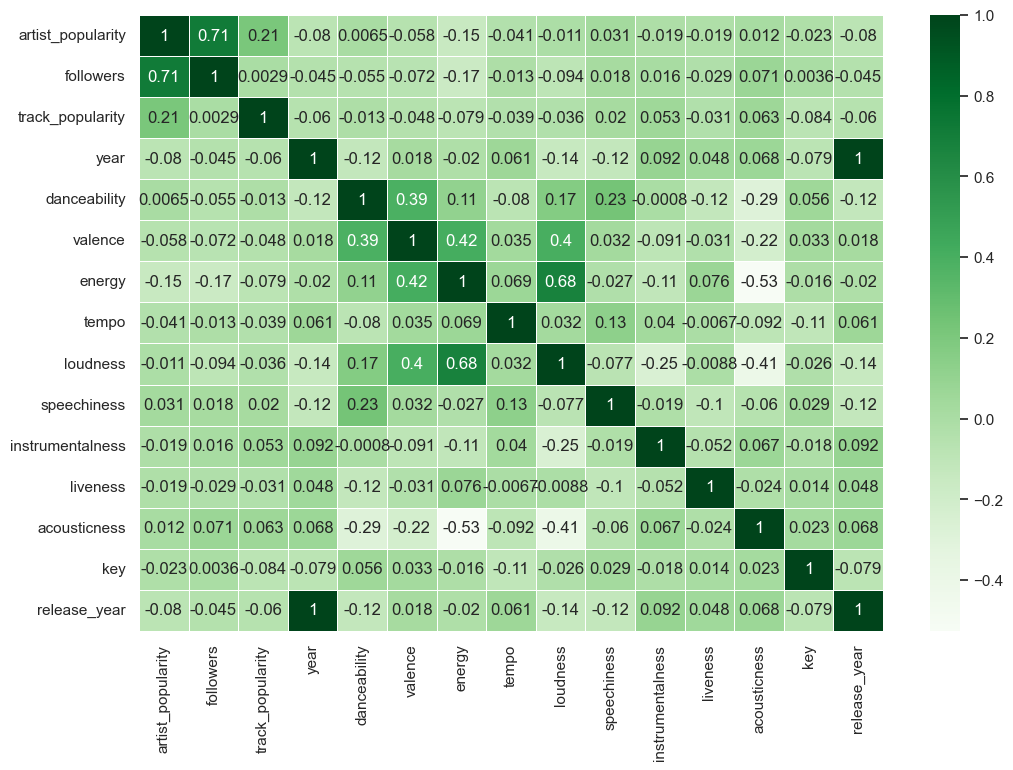

In [97]:
# Visualizndo de forma mais gráfica
fig, ax = plt.subplots(figsize = (12,8))

_ = sns.heatmap(df.corr(), cmap = 'Greens', linewidth = 0.5, annot = True)

# Testando as Hipóteses:

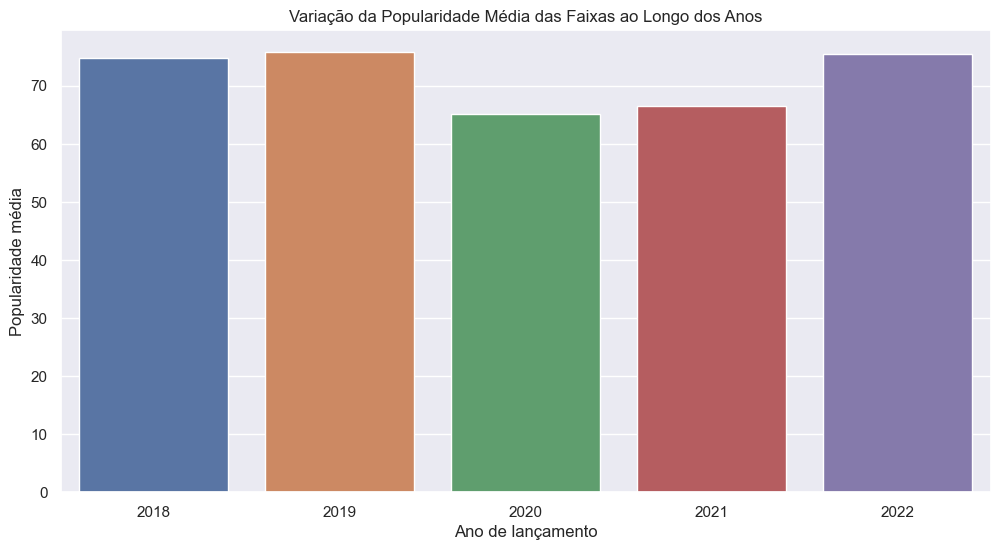

In [33]:
# Verificando a 1º hipótese

df['release_year'] = pd.to_datetime(df['year'], format='%Y').dt.year
yearly_popularity = df.groupby('release_year')['track_popularity'].mean()

sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x = yearly_popularity.index, y = yearly_popularity.values)
ax.set_xlabel('Ano de lançamento')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média das Faixas ao Longo dos Anos')
plt.show()

<b> Podemos observar uma queda na popularidade média das músicas a partir de 2020 e só voltando a retornar ao mesmo patamar em 2022.

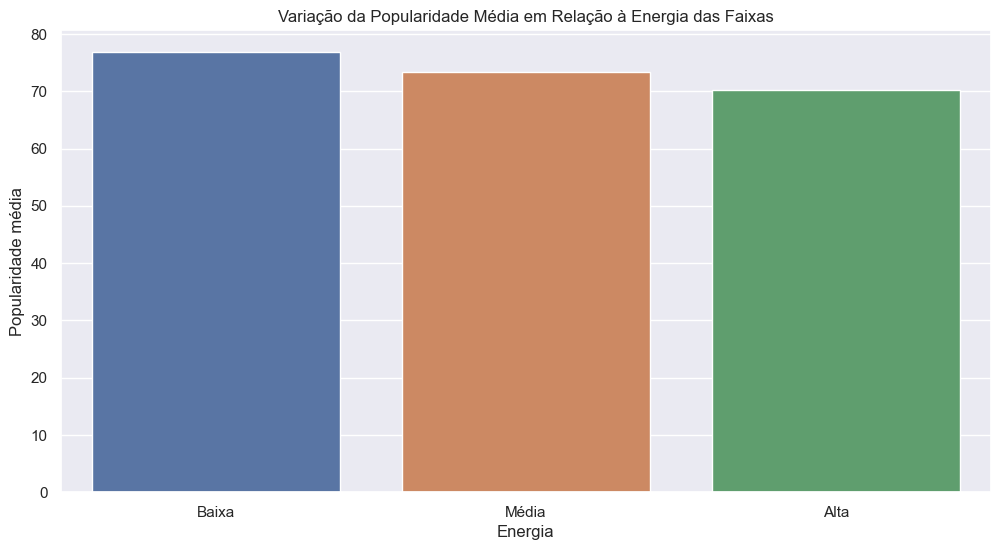

In [28]:
# Verificando a 2º hipótese

bins = [0, 0.3, 0.6, 1]
labels = ['Baixa', 'Média', 'Alta']
df['energy_group'] = pd.cut(df['energy'], bins=bins, labels=labels)

energy_popularity = df.groupby('energy_group')['track_popularity'].mean()

sns.set(style = 'darkgrid')
plt.figure(figsize = (12,6))
ax = sns.barplot(x = energy_popularity.index, y = energy_popularity.values)
ax.set_xlabel('Energia')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média em Relação à Energia das Faixas')
plt.show()



<b> Podemos observar que faixas menos enérgicas são mais populares.

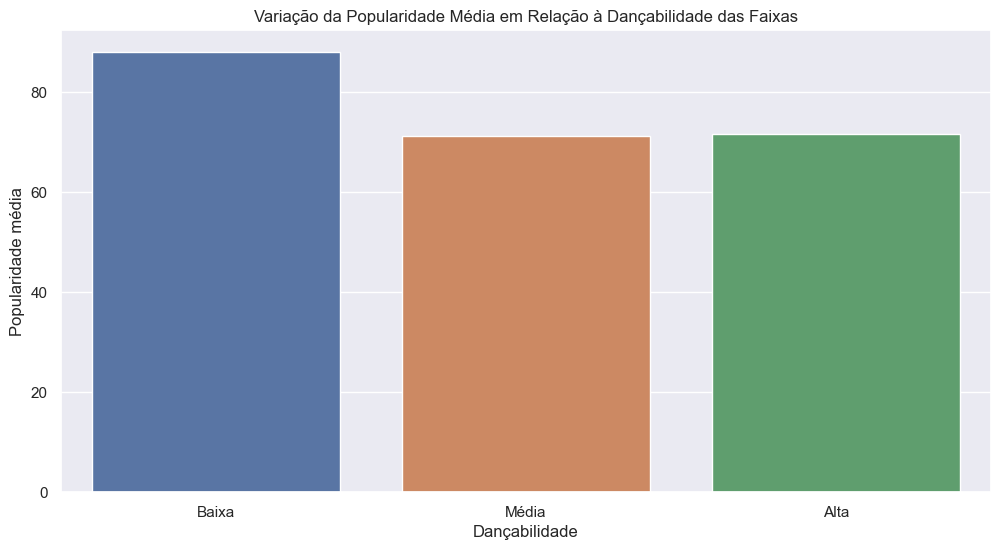

In [27]:
# Verificando a 3º hipótese

bins = [0, 0.3, 0.6, 1]
labels = ['Baixa', 'Média', 'Alta']

df['danceability_group'] = pd.cut(df['danceability'], bins=bins, labels=labels)
danceability_popularity = df.groupby('danceability_group')['track_popularity'].mean()

plt.figure(figsize = (12,6))
ax = sns.barplot(x = danceability_popularity.index, y = danceability_popularity.values)
ax.set_xlabel('Dançabilidade')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média em Relação à Dançabilidade das Faixas')
plt.show()

<b> Aparentemente faixas menos dançantes são mais populares. No entanto, não parece haver distinção de popularidade entre faixas com dançabilidade média e alta.

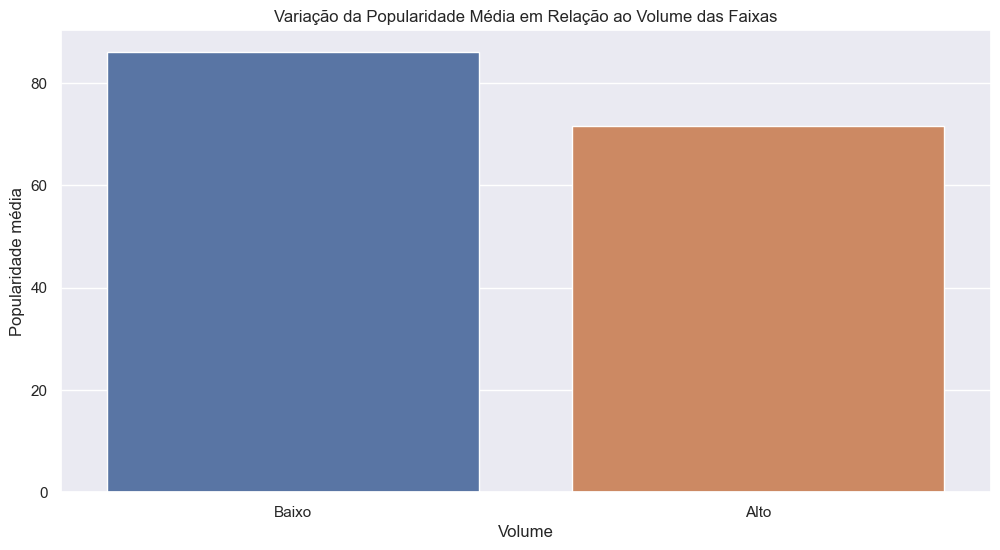

In [26]:
# Verificando a 4º hipótese

bins = [-30, -15, 0]
labels = ['Baixo', 'Alto']

df['loudness_group'] = pd.cut(df['loudness'], bins=bins, labels=labels)
loudness_popularity = df.groupby('loudness_group')['track_popularity'].mean()

plt.figure(figsize = (12,6))
ax = sns.barplot(x = loudness_popularity.index, y = loudness_popularity.values)
ax.set_xlabel('Volume')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média em Relação ao Volume das Faixas')
plt.show()


<b> Faixas com baixo volume (loudness) apresentam maior popularidade média.

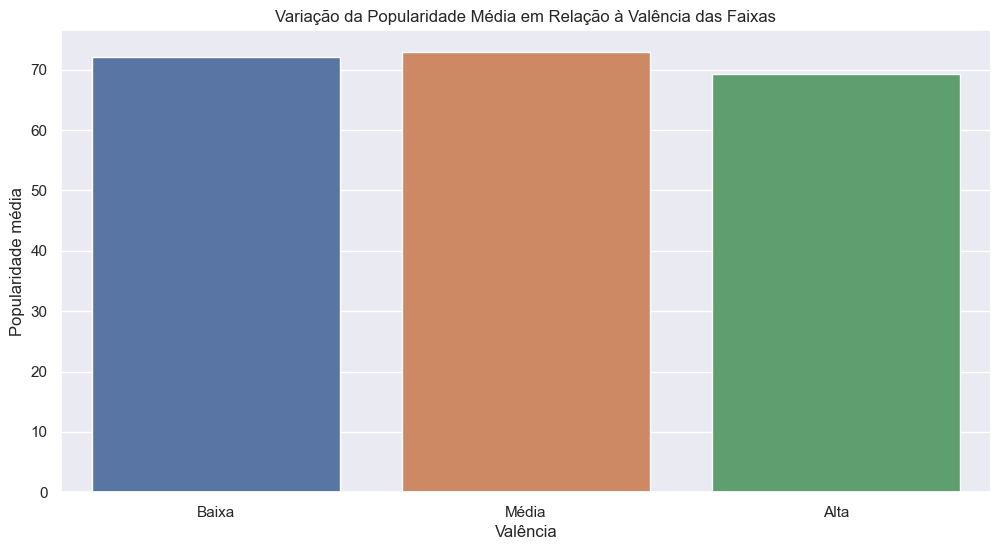

In [25]:
# Verificando a 5º hipótese

bins = [0, 0.3, 0.6, 1]
labels = ['Baixa', 'Média', 'Alta']

df['valence_group'] = pd.cut(df['valence'], bins=bins, labels=labels)
valence_popularity = df.groupby('valence_group')['track_popularity'].mean()

plt.figure(figsize = (12,6))
ax = sns.barplot(x = valence_popularity.index, y = valence_popularity.values)
ax.set_xlabel('Valência')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média em Relação à Valência das Faixas')
plt.show()

<b> Faixas medianamente positivas tendem a ser mais populares entre os ouvintes, porém é possível notar que o público tem uma tendência a apreciar faixas com valências mais negativa do que faixas com valências mais positivas.


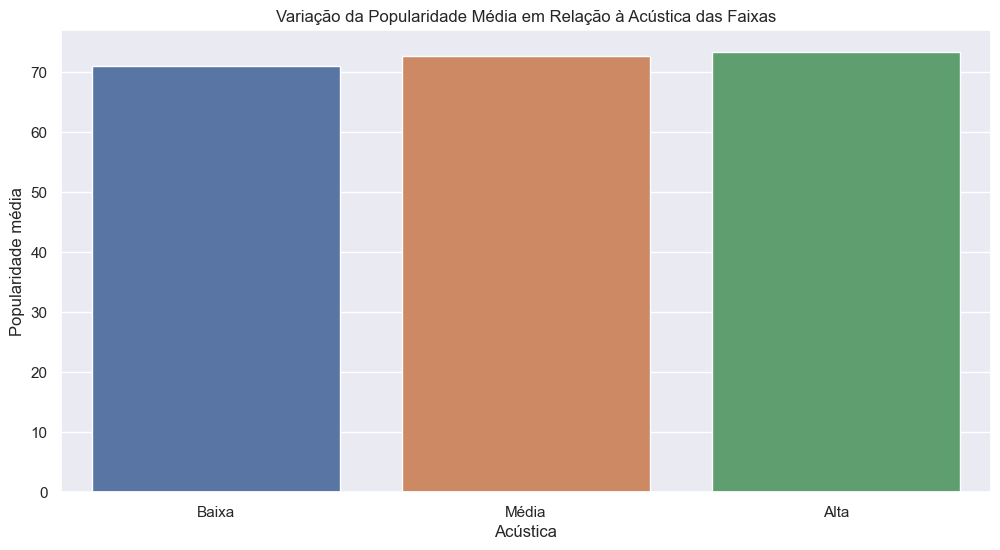

In [24]:
# 6º hipótese

bins = [0, 0.3, 0.6, 1]
labels = ['Baixa', 'Média', 'Alta']

df['acousticness_group'] = pd.cut(df['acousticness'], bins=bins, labels=labels)
acousticness_popularity = df.groupby('acousticness_group')['track_popularity'].mean()

plt.figure(figsize = (12,6))
ax = sns.barplot(x = acousticness_popularity.index, y = acousticness_popularity.values)
ax.set_xlabel('Acústica')
ax.set_ylabel('Popularidade média')
ax.set_title('Variação da Popularidade Média em Relação à Acústica das Faixas')
plt.show()


<b> O público possui uma certa tendência a preferir faixas mais acústicas.